In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from wordcloud import WordCloud
import plotly.express as px
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from wordcloud import WordCloud


In [13]:
movies = pd.read_csv('/content/rotten_tomatoes_movies.csv')
movie_reviews=pd.read_csv('/content/rotten_tomatoes_movies.csv')

In [14]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

In [16]:
movies=movies.drop(["runtimeMinutes","title"],axis='columns')
# movie_reviews=movie_reviews.drop(["reviewUrl","reviewId"],axis='columns')

In [17]:
print(movies.shape)
print(movie_reviews.shape)


(143258, 14)
(143258, 16)


In [18]:
mov_rev_comb=pd.merge(movie_reviews,movies,on='id')

In [19]:
mov_rev_comb.head()

,id,title,audienceScore_x,tomatoMeter_x,rating_x,ratingContents_x,releaseDateTheaters_x,releaseDateStreaming_x,runtimeMinutes,genre_x,...,ratingContents_y,releaseDateTheaters_y,releaseDateStreaming_y,genre_y,originalLanguage_y,director_y,writer_y,boxOffice_y,distributor_y,soundMix_y
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",...,NaN,NaN,2018-08-25,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,...,NaN,NaN,2020-02-11,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,...,NaN,NaN,NaN,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",...,NaN,NaN,2020-10-23,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",...,NaN,NaN,2017-03-27,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


<Axes: >

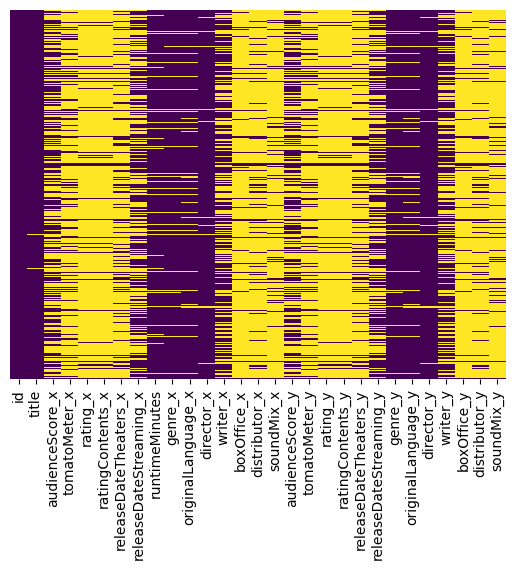

In [20]:
sns.heatmap(mov_rev_comb.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
Sm_Pie_ss=mov_rev_comb.scoreSentiment.value_counts().index
SM_count_pie_ss=mov_rev_comb.scoreSentiment.value_counts().values

AttributeError: ignored

In [ ]:
plt.title("score sentiment Distribution")
plt.pie(SM_count_pie_ss,labels=Sm_Pie_ss,autopct='%1.2f%%')

In [ ]:
mov_rev_comb['releaseDateTheaters']=pd.to_datetime(mov_rev_comb['releaseDateTheaters'][1:])
mov_rev_comb['releaseDateTheatersYears']=mov_rev_comb['releaseDateTheaters'][1:].dt.year
mov_rev_comb=mov_rev_comb.drop(columns='releaseDateTheaters')


In [22]:
mov_rev_comb.columns

Index(['id', 'title', 'audienceScore_x', 'tomatoMeter_x', 'rating_x',
       'ratingContents_x', 'releaseDateTheaters_x', 'releaseDateStreaming_x',
       'runtimeMinutes', 'genre_x', 'originalLanguage_x', 'director_x',
       'writer_x', 'boxOffice_x', 'distributor_x', 'soundMix_x',
       'audienceScore_y', 'tomatoMeter_y', 'rating_y', 'ratingContents_y',
       'releaseDateTheaters_y', 'releaseDateStreaming_y', 'genre_y',
       'originalLanguage_y', 'director_y', 'writer_y', 'boxOffice_y',
       'distributor_y', 'soundMix_y'],
      dtype='object')

In [ ]:
Sm_box_rdty=mov_rev_comb.releaseDateTheatersYears.value_counts().index
Sm_count_box_rdty=mov_rev_comb.releaseDateTheatersYears.value_counts().values

In [ ]:
mov_rev_comb.releaseDateTheatersYears.value_counts()

In [ ]:
plt.bar(Sm_box_rdty,Sm_count_box_rdty)
plt.title('Reviews count over years',fontweight="bold")
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
Sm_pie_itc=mov_rev_comb.isTopCritic.value_counts().index
Sm_count_pie_itc=mov_rev_comb.isTopCritic.value_counts().values

In [ ]:
plt.title("is top critic Distribution")
plt.pie(Sm_count_pie_itc,labels=Sm_pie_itc,autopct='%1.2f%%')

Critic information

In [ ]:
mov_rev_comb.criticName.unique()

In [ ]:
Sm_bar_cn=mov_rev_comb.criticName.value_counts().index
Sm_count_bar_cn=mov_rev_comb.criticName.value_counts().values


In [ ]:
mov_rev_comb.criticName.value_counts()[:20]

In [ ]:
plt.bar(Sm_bar_cn[:20],Sm_count_bar_cn[:20])
plt.title('Top 10 critics',fontweight="bold")
plt.xticks(rotation='vertical')
plt.figure(figsize=(50,50))
plt.show()

In [ ]:
Sm_bar_genre=mov_rev_comb.genre.value_counts().index
Sm_count_bar_genre=mov_rev_comb.genre.value_counts().values

In [ ]:
plt.bar(Sm_bar_genre[:20],Sm_count_bar_genre[:20])
plt.title('Top 10 genre',fontweight="bold")
plt.xticks(rotation='vertical')
plt.figure(figsize=(50,50))
plt.show()

In [ ]:
mov_rev_comb.columns

In [ ]:
mov_rev_comb['mapped_scoreSentiment']=mov_rev_comb['scoreSentiment'].replace({'POSITIVE':1,'NEGATIVE':0})
mov_rev_comb=mov_rev_comb.drop(columns='scoreSentiment')

In [ ]:
corr_matrix=mov_rev_comb.corr(numeric_only=True)
mov_rev_comb.info()

In [ ]:
sns.clustermap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
mov_rev_comb.boxOffice.value_counts()

In [ ]:
mov_rev_comb['boxOfficeAmount']=mov_rev_comb['boxOffice'].str.strip().replace({'\$':'','M':'e6','K':'e3'},regex=True).astype(float)

In [ ]:
mov_rev_comb['boxOfficeAmount']=mov_rev_comb['boxOfficeAmount'].fillna(0)

In [ ]:
mov_rev_comb.boxOfficeAmount.value_counts()

In [ ]:
mov_rev_comb.corr(numeric_only=True)

In [ ]:
columns_to_drop=['mapped_scoreSentiment','audienceScore']
mov_rev_comb_dropped_least_corr_columns=mov_rev_comb.drop(columns_to_drop, axis=1)

In [ ]:
#corr_matrix=mov_rev_comb_dropped_least_corr_columns.corr()

In [ ]:
sns.clustermap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
mov_rev_comb.genre.value_counts()

In [ ]:
mov_rev_comb['genre']=mov_rev_comb['genre'].fillna('NA')

mov_rev_comb['genre_modified']=mov_rev_comb['genre'].str.strip().str.split(',',expand=True)[0]

In [ ]:
mov_rev_comb['genre_modified']=mov_rev_comb['genre'].str.strip().str.split(',',expand=True)[0]

In [ ]:
var=list(mov_rev_comb.genre_modified.value_counts().index)

In [ ]:
var.sort()

In [ ]:
var

In [ ]:
genre_map={'Action':1,
 'Adventure':2,
 'Animation':3,
 'Anime':4,
 'Biography':5,
 'Comedy':6,
 'Crime':7,
 'Documentary':8,
 'Drama':9,
 'Faith & spirituality':10,
 'Fantasy':11,
 'Gay & lesbian':12,
 'History':13,
 'Holiday':14,
 'Horror':15,
 'Kids & family':16,
 'Lgbtq+':17,
 'Music':18,
 'Musical':19,
 'Mystery & thriller':20,
 'NA':21,
 'Other':22,
 'Romance':23,
 'Sci-fi':24,
 'Sports':25,
 'Stand-up':26,
 'Variety':27,
 'War':28,
 'Western':29}

In [ ]:
mov_rev_comb['mapped_genre']=mov_rev_comb['genre_modified'].map(genre_map)
mov_rev_comb['mapped_genre']

In [ ]:
Sm_bar_genre=mov_rev_comb.mapped_genre.value_counts().index
Sm_count_bar_genre=mov_rev_comb.mapped_genre.value_counts().values
Sm_bar_genre
plt.bar(Sm_bar_genre[:30],Sm_count_bar_genre[:30])
plt.title('Review count genre', fontweight="bold")
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
select_for_genre=['mapped_scoreSentiment','mapped_genre']
mov_rev_comb_genre_plot=mov_rev_comb[select_for_genre]

In [ ]:
sn.scatterplot(mov_rev_comb_genre_plot)

In [ ]:
mov_rev_comb.columns

In [ ]:
selected_columns=['audienceScore','boxOfficeAmount','mapped_scoreSentiment']
mov_rev_comb_scatter_plot=mov_rev_comb[selected_columns]

In [ ]:
mov_rev_comb_scatter_plot['audienceScore']=mov_rev_comb_scatter_plot['audienceScore'].fillna(1)

In [ ]:
mov_rev_comb_scatter_plot.head()

In [ ]:
mov_rev_comb_scatter_plot.corr()

In [ ]:
merged_data = pd.merge(movies, movie_reviews, on='id')


In [ ]:
merged_data.head()

In [ ]:
print(f"There are {merged_data.shape[0] - merged_data.dropna().shape[0]} rows with at least one missing value.")


In [ ]:
merged_data['audienceScore_x'].apply(type).value_counts()


In [ ]:
merged_data.columns

In [ ]:
print(f"There are {merged_data.shape[0] - merged_data.dropna().shape[0]} rows with at least one missing value.")


In [ ]:
merged_data['audienceScore_x'].apply(type).value_counts()


In [ ]:
merged_data['audienceScore_x'] = pd.to_numeric(merged_data['audienceScore_x'], errors='coerce')


In [ ]:
merged_data['audienceScore_x'].fillna((merged_data['audienceScore_x'].mean()), inplace=True)


In [ ]:
merged_data['director_y'].fillna((merged_data['director_y'].mode()[0]), inplace=True)


In [ ]:
threshold = 0.8  #removing columns with more than 80% missing values
merged_data = merged_data[merged_data.columns[merged_data.isnull().mean() < threshold]]

In [ ]:
merged_data.columns # display all columns after removing columns with more than 80% missing values


In [ ]:
print(f"There are {merged_data.shape[0] - merged_data.dropna().shape[0]} rows with at least one missing value.")


In [ ]:
merged_data['runtimeMinutes'].fillna((merged_data['runtimeMinutes'].mean()), inplace=True)

# For originalLanguage columns replace by mode
merged_data['originalLanguage_y'].fillna((merged_data['originalLanguage_y'].mode()[0]), inplace=True)

In [ ]:
merged_data['audienceScore_x'].fillna((merged_data['audienceScore_x'].mean()), inplace=True)


In [ ]:
clean_data = merged_data.dropna() # drop rows having missing values


In [ ]:
print(f"There are {clean_data.shape[0] - clean_data.dropna().shape[0]} rows with at least one missing value.")


In [ ]:
clean_data.shape # Get an overview of the dataset's shape (number of rows and columns) of clean_data


In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(clean_data[['audienceScore_x', 'tomatoMeter_y', 'runtimeMinutes']].corr(), annot=True, cmap='coolwarm')
plt.show()
#plt.savefig('heatmap.png')

In [ ]:
#Categorical vs Numerical Analysis
# Categorical vs Numerical Analysis
clean_data.groupby('originalLanguage_x')['audienceScore_x'].mean().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Average Audience Score')
plt.tight_layout()
plt.show()
#plt.savefig('language_vs_audience_score.png')

In [ ]:
#Categorical vs Categorical Analysis
# Identify the top 5 languages
top_languages = clean_data['originalLanguage_x'].value_counts().nlargest(5).index

# Filter the dataframe for only these top 5 languages
filtered_data = clean_data[clean_data['originalLanguage_x'].isin(top_languages)]

# Now create a cross-tabulation of 'rating' and 'originalLanguage' for these top 5 languages
crosstab_table = pd.crosstab(filtered_data['rating_x'], filtered_data['originalLanguage_x'])
print(crosstab_table)
# Save the crosstab_table to a .csv file
#crosstab_table.to_csv('crosstab_table_top5languages.csv')

In [ ]:
# drop_columns = ['ratingContents', 'distributor', 'soundMix', 'reviewId', 'publicatioName']
# clean_data = clean_data.drop(columns=drop_columns)

# Outliers handling for 'runtimeMinutes' using IQR method
Q1 = clean_data['runtimeMinutes'].quantile(0.25)
Q3 = clean_data['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1
clean_data = clean_data[~((clean_data['runtimeMinutes'] < (Q1 - 1.5 * IQR)) | (clean_data['runtimeMinutes'] > (Q3 + 1.5 * IQR)))]

clean_data.shape # check the shape of the dataframe after data cleaning

In [ ]:
clean_data.shape # check the shape of the dataframe after data cleaning


In [ ]:
clean_data.info() # view the data type


In [ ]:
sample_data = clean_data.sample(frac=0.1, random_state=42)

# Reset index of the DataFrame
sample_data.reset_index(drop=True, inplace=True)
sample_data.shape # check the shape of the dataframe after sampling

In [ ]:

# Combine text columns into one combined_text column
sample_data['combined_text'] = sample_data['genre_x'] + ' ' + sample_data['director_x'] + ' ' + sample_data['writer_x'] + ' ' + sample_data['originalLanguage_x']

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined_text column
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_data['combined_text'])

# Convert releaseDateTheaters to timestamp and get the year
sample_data['releaseDateTheaters_x'] = pd.to_datetime(sample_data['releaseDateTheaters_x']).dt.year

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_runtime = scaler.fit_transform(np.array(sample_data['runtimeMinutes']).reshape(-1, 1))
scaled_release_date = scaler.fit_transform(np.array(sample_data['releaseDateTheaters_x']).reshape(-1, 1))

# Concatenate the TF-IDF vectors with the scaled numerical vectors
feature_matrix = np.concatenate([tfidf_matrix.toarray(), scaled_runtime, scaled_release_date], axis=1)

# Create a NearestNeighbors model
# model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
model_knn= NearestNeighbors(metric='euclidean', algorithm='brute', n_neighbors=76, n_jobs=-1)
# Fit the model to the data
model_knn.fit(feature_matrix)

def recommend_movies(movie_title):
    movie_index = sample_data[sample_data['title'] == movie_title].index[0]
    movie_features = feature_matrix[movie_index]
    movie_features_2D = movie_features.reshape(1, -1)  # reshape the array to 2D
    distances, indices = model_knn.kneighbors(movie_features_2D, n_neighbors=77)
    indices_list = indices.squeeze().tolist()
    recommended_movies = sample_data.iloc[indices_list].title.unique()
    # Exclude the input movie title from the recommendations
    recommended_movies = [movie for movie in recommended_movies if movie != movie_title]
    return recommended_movies

# Display the first 10 movie titles in the DataFrame
print(sample_data['title'].head(10))

In [ ]:
merged_data.columns

In [ ]:
recommendations = recommend_movies("Dinner for Schmucks")
print(recommendations)

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
sample_data['cluster'] = kmeans.fit_predict(feature_matrix)

def recommend_movies_kmeans(movie_title):
    # Find the cluster for the input movie
    cluster = sample_data[sample_data['title'] == movie_title]['cluster'].iloc[0]

    # Recommend other movies from the same cluster
    recommended_movies = sample_data[sample_data['cluster'] == cluster]['title'].tolist()

    # Exclude the input movie title from the recommendations
    recommended_movies = [movie for movie in recommended_movies if movie != movie_title]
    return recommended_movies

In [ ]:
recommendations_kmeans = recommend_movies_kmeans("Dinner for Schmucks")
print(recommendations_kmeans)

In [ ]:
# Define the number of recommendations to fetch from each model
N = 10

def get_top_n_knn_recommendations(movie_title, n=N):
    movie_index = sample_data[sample_data['title'] == movie_title].index[0]
    movie_features = feature_matrix[movie_index]
    movie_features_2D = movie_features.reshape(1, -1)
    distances, indices = model_knn.kneighbors(movie_features_2D, n_neighbors=n+1)  # +1 to account for the movie itself
    indices_list = indices.squeeze().tolist()
    recommended_movies = sample_data.iloc[indices_list].title.unique()
    # Exclude the input movie title from the recommendations
    recommended_movies = [movie for movie in recommended_movies if movie != movie_title]
    return recommended_movies

def get_top_n_kmeans_recommendations(movie_title, n=N):
    cluster = sample_data[sample_data['title'] == movie_title]['cluster'].iloc[0]
    movies_in_cluster = sample_data[sample_data['cluster'] == cluster]['title'].tolist()

    # Getting closest movies based on feature similarity within the cluster
    movie_index = sample_data[sample_data['title'] == movie_title].index[0]
    distances_to_movies_in_cluster = [np.linalg.norm(feature_matrix[movie_index] - feature_matrix[i]) for i in sample_data[sample_data['cluster'] == cluster].index]

    sorted_idx = np.argsort(distances_to_movies_in_cluster)
    recommended_movies = [movies_in_cluster[i] for i in sorted_idx[:n+1]]  # +1 to account for the movie itself
    # Exclude the input movie title from the recommendations
    recommended_movies = [movie for movie in recommended_movies if movie != movie_title]
    return recommended_movies

# Function to compare the two recommendation lists
def compare_recommendations(movie_title, n=N):
    knn_recs = set(get_top_n_knn_recommendations(movie_title, n))
    kmeans_recs = set(get_top_n_kmeans_recommendations(movie_title, n))
    common_movies = knn_recs.intersection(kmeans_recs)
    return len(common_movies) / n

# Initialize a list to store all agreement ratios
agreement_ratios = []

# Loop through all the movie titles in sample_data
for movie_title in sample_data['title'].tolist():
    agreement_ratio = compare_recommendations(movie_title)
    agreement_ratios.append(agreement_ratio)

# Calculate the average agreement ratio
average_agreement = np.mean(agreement_ratios)

print(f"The average agreement ratio between KNN and KMeans models for the sample data is {average_agreement*100:.2f}%.")
sample_data=sample_data.dropna()

In [ ]:
def convert_boxoffice(value):
    try:
        # Check if the value ends with 'M'
        if value[-1] == 'M':
            return float(value.replace('$', '').replace('M', '')) * 1e6
        # Check if the value ends with 'k'
        elif value[-1] == 'k':
            return float(value.replace('$', '').replace('k', '')) * 1e3
        # If it's just a number
        else:
            return float(value.replace('$', ''))
    except:
        return np.nan

# Apply the conversion function to the 'boxOffice' column
sample_data['boxOffice_y'] = sample_data['boxOffice_y'].apply(convert_boxoffice)

# Replace NaN values with the mean of the 'boxOffice' column
sample_data['boxOffice_y'].fillna(sample_data['boxOffice_y'].mean(), inplace=True)
sample_data['audienceScore_y'].fillna(sample_data['audienceScore_y'].mean(), inplace=True)


# 1. TF-IDF Vectorization for 'reviewText'
# tfidf_vectorizer_review = TfidfVectorizer(stop_words='english', max_features=5000)
# tfidf_matrix_review = tfidf_vectorizer_review.fit_transform(sample_data['reviewText'].fillna(''))

# 2. Normalization of numerical features
scaler_boxOffice = MinMaxScaler()
scaled_boxOffice = scaler_boxOffice.fit_transform(np.array(sample_data['boxOffice_y']).reshape(-1, 1))

# scaler_originalScore = MinMaxScaler()
# scaled_originalScore = scaler_originalScore.fit_transform(np.array(sample_data['originalScore']).reshape(-1, 1))

scaler_audienceScore = MinMaxScaler()
scaled_audienceScore = scaler_audienceScore.fit_transform(np.array(sample_data['audienceScore_y']).reshape(-1, 1))

# Combine all the feature vectors into a single matrix
feature_matrix_knowledge = np.concatenate([scaled_boxOffice,scaled_audienceScore], axis=1)



In [ ]:
sample_data.columns

In [ ]:
sample_data.columns

In [ ]:
X_train, X_test = train_test_split(feature_matrix_knowledge, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
X_train_imputed = imputer.fit_transform(X_train)

model_knowledge = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

model_knowledge.fit(X_train_imputed)

In [ ]:
def get_recommendations_knowledge(movie_title, n=10):
    # Find the index of the movie
    idx = sample_data[sample_data['title'] == movie_title].index[0]

    # Get the distances and indices of the n nearest neighbors
    distances, indices = model_knowledge.kneighbors([feature_matrix_knowledge[idx]])

    # Return the titles of the nearest neighbors
    return sample_data['title'].iloc[indices[0]].tolist()

In [ ]:
recommendations = get_recommendations_knowledge('Bombshell')
print(recommendations)